# Exploratory Data Analysis (EDA)
## Brazilian E-Commerce (Olist) Dataset

This notebook performs exploratory data analysis on the Brazilian E-Commerce dataset.
The objective is to understand sales trends, customer behavior, product performance,
and delivery efficiency before building predictive and analytical models.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [26]:
df = pd.read_csv("../data/processed/olist_full_orders.csv")

df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,revenue,delivery_days,delay_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,38.71,8.0,-8.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,38.71,8.0,-8.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,38.71,8.0,-8.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,141.46,13.0,-6.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,179.12,9.0,-18.0


In [36]:
reviews = pd.read_csv("../data/processed/review_sentiments.csv")


In [27]:
df.shape


(118434, 33)

In [28]:
df.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'revenue',
       'delivery_days', 'delay_days'],
      dtype='object')

### Dataset Overview

The dataset contains order-level, customer-level, product-level, review, and delivery information.
Each row represents a purchased product item linked to an order.


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   order_item_id                  117604 non-null  float64
 9   product_id                     117604 non-null  object 
 10  seller_id                      117604 non-null  object 
 11  shipping_limit_date            117604 non-null  object 
 12  price                         

In [30]:
df.isna().sum().sort_values(ascending=False)


order_delivered_customer_date    3397
delivery_days                    3397
delay_days                       3397
product_description_lenght       2528
product_name_lenght              2528
product_photos_qty               2528
product_category_name            2528
order_delivered_carrier_date     2074
product_height_cm                 850
product_length_cm                 850
product_weight_g                  850
product_width_cm                  850
product_id                        830
price                             830
shipping_limit_date               830
order_item_id                     830
freight_value                     830
seller_id                         830
order_approved_at                 176
payment_installments                3
payment_value                       3
payment_sequential                  3
payment_type                        3
order_id                            0
order_estimated_delivery_date       0
order_purchase_timestamp            0
order_status

Missing values are mainly observed in review and delivery-related fields.
These were handled during preprocessing and do not significantly impact analysis.


## Business Questions Explored

1. How does revenue change over time?
2. Which product categories contribute the most to revenue?
3. How long do deliveries typically take?
4. Do delivery delays impact customer ratings?
5. What does customer feedback indicate about service quality?
    

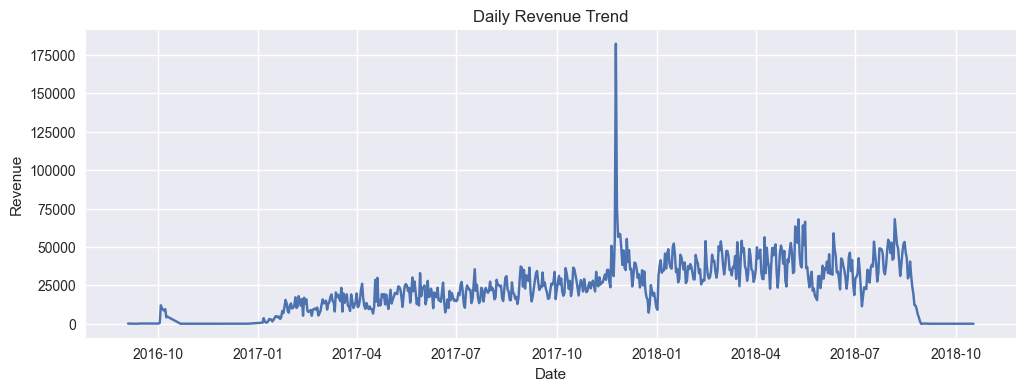

In [31]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

daily_revenue = (
    df.groupby(df['order_purchase_timestamp'].dt.date)['revenue']
    .sum()
)

plt.figure(figsize=(12,4))
daily_revenue.plot()
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()
    

Revenue shows fluctuations over time with visible peaks,
indicating seasonality and promotional effects.


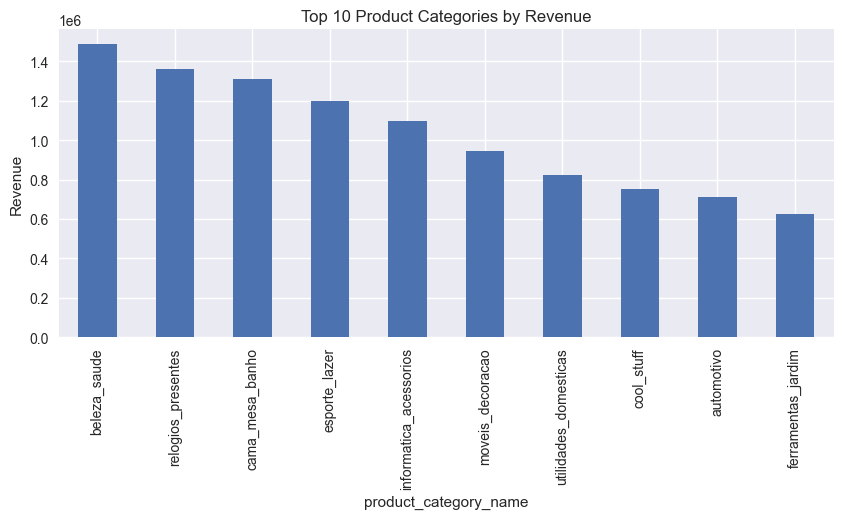

In [32]:
category_revenue = (
    df.groupby("product_category_name")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

category_revenue.plot(kind="bar", figsize=(10,4))
plt.title("Top 10 Product Categories by Revenue")
plt.ylabel("Revenue")
plt.show()


A small number of product categories contribute a large share of total revenue,
following the Pareto (80-20) principle.


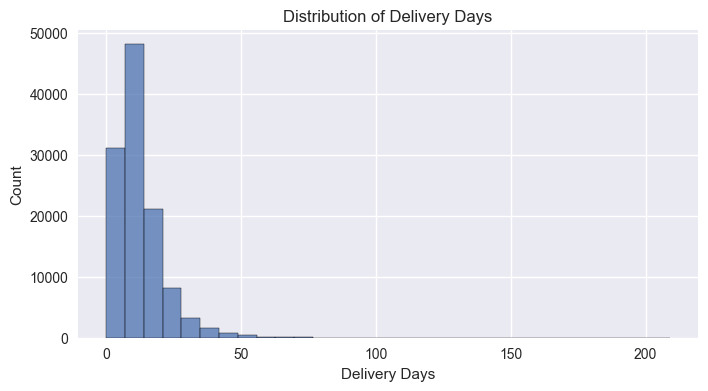

In [33]:
plt.figure(figsize=(8,4))
sns.histplot(df["delivery_days"], bins=30)
plt.title("Distribution of Delivery Days")
plt.xlabel("Delivery Days")
plt.show()


Most orders are delivered within 10–15 days.
However, a long tail of delayed deliveries exists.


In [34]:
print(sorted(df.columns))


['customer_city', 'customer_id', 'customer_state', 'customer_unique_id', 'customer_zip_code_prefix', 'delay_days', 'delivery_days', 'freight_value', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_id', 'order_item_id', 'order_purchase_timestamp', 'order_status', 'payment_installments', 'payment_sequential', 'payment_type', 'payment_value', 'price', 'product_category_name', 'product_description_lenght', 'product_height_cm', 'product_id', 'product_length_cm', 'product_name_lenght', 'product_photos_qty', 'product_weight_g', 'product_width_cm', 'revenue', 'seller_id', 'shipping_limit_date']


In [37]:
df_merged = df.merge(
    reviews[["order_id", "review_score"]],
    on="order_id",
    how="left"
)


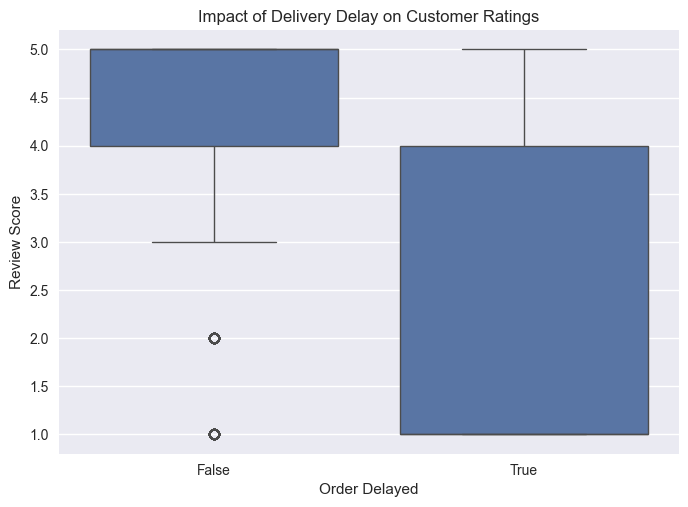

In [39]:
sns.boxplot(
    x=df_merged["delay_days"] > 0,
    y=df_merged["review_score"]
)

plt.xlabel("Order Delayed")
plt.ylabel("Review Score")
plt.title("Impact of Delivery Delay on Customer Ratings")
plt.show()


Orders with delivery delays tend to receive lower customer ratings,
indicating that logistics performance directly affects customer satisfaction.


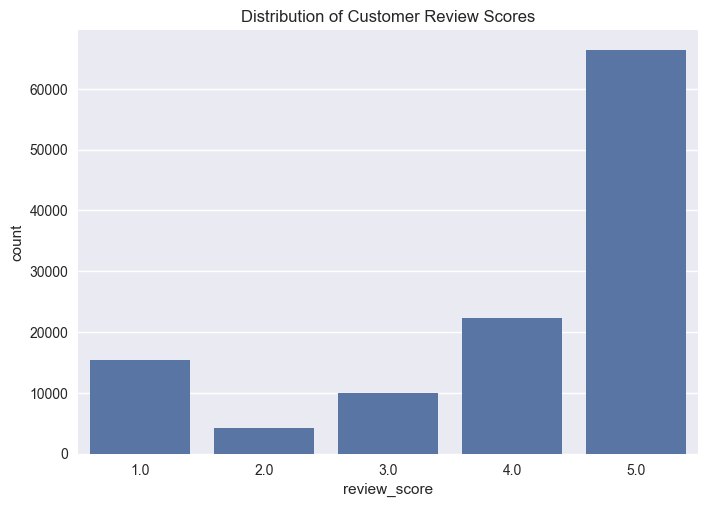

In [43]:
sns.countplot(x="review_score", data=df_merged)
plt.title("Distribution of Customer Review Scores")
plt.show()
